In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import array_to_latex as ltx

In [2]:
def covariance(x,y):
    c=np.inner(y,x)/len(x)-(sum(x)/len(x))*(sum(y)/len(y))
    return c
def rate_error(x,y,k):
    c = ((len(y)-2)**-0.5)*((covariance(y,y)/covariance(x,x)-k**2)**0.5)
    return c

In [3]:
data_array = pd.read_csv("data1csv.csv",  sep=";", decimal=",")
t1=data_array.loc[:5,:].to_numpy()
t2=data_array.loc[7:,:].to_numpy()
#tabular1=np.transpose(t1)
#tabular2=np.transpose(t2)
data_array

,"m, повышение",m сумм,P,"n, mm, pm 0.5","dl,mm"
0,246.1,970,9.52,15,0.707
1,245.6,1215.6,11.93,16.3,0.768
2,245.7,1461.3,14.34,17.6,0.829
3,491.8,1953.1,19.17,19.9,0.937
4,245.5,2198.6,21.58,21.1,0.994
5,245.8,2444.4,23.99,22.2,1.046
6,"m,понижение",NaN,P,"n,mm","dl,mm"
7,245.8,2444.4,23.99,22.2,1.046
8,245.5,2198.6,21.58,21.1,0.994
9,246.1,1953.1,19.17,20,0.942


In [4]:
ltx.to_ltx(data_array.loc[:5,:])

\begin{tabular}{lrrrrr}
\toprule
     & m, повышение & m сумм & P & n, mm, pm 0.5 & dl,mm \\\n\midrule
 0 &  246.1 &  970    &  9.52  &  15   &  0.707\\
 1 &  245.6 &  1215.6 &  11.93 &  16.3 &  0.768\\
 2 &  245.7 &  1461.3 &  14.34 &  17.6 &  0.829\\
 3 &  491.8 &  1953.1 &  19.17 &  19.9 &  0.937\\
 4 &  245.5 &  2198.6 &  21.58 &  21.1 &  0.994\\
 5 &  245.8 &  2444.4 &  23.99 &  22.2 &  1.046\\
\bottomrule
\end{tabular}


In [5]:
ltx.to_ltx(data_array.loc[7:,:])

\begin{tabular}{lrrrrr}
\toprule
     & m, повышение & m сумм & P & n, mm, pm 0.5 & dl,mm \\\n\midrule
 7 &  245.8 &  2444.4 &  23.99 &  22.2 &  1.046\\
 8 &  245.5 &  2198.6 &  21.58 &  21.1 &  0.994\\
 9 &  246.1 &  1953.1 &  19.17 &  20   &  0.942\\
 10 &  245.7 &  1707   &  16.76 &  18.9 &  0.890\\
 11 &  245.7 &  1461.3 &  14.34 &  17.6 &  0.829\\
 12 &  245.6 &  1215.6 &  11.93 &  16.5 &  0.777\\
 13 &  246.1 &  970    &  9.52  &  15.2 &  0.716\\
 14 &  245.2 &  723.9  &  7.11  &  14.2 &  0.669\\
 15 &  478.7 &  478.7  &  4.70  &  12.6 &  0.593\\
\bottomrule
\end{tabular}


In [6]:
P,dl=np.concatenate((t1[:-1,2],t2[:-1,2]),axis=0).astype(float),np.concatenate((t1[:-1,4],t2[:-1,4]),axis=0).astype(float)
P

array([ 9.52, 11.93, 14.34, 19.17, 21.58, 23.99, 21.58, 19.17, 16.76,
       14.34, 11.93,  9.52,  7.11])

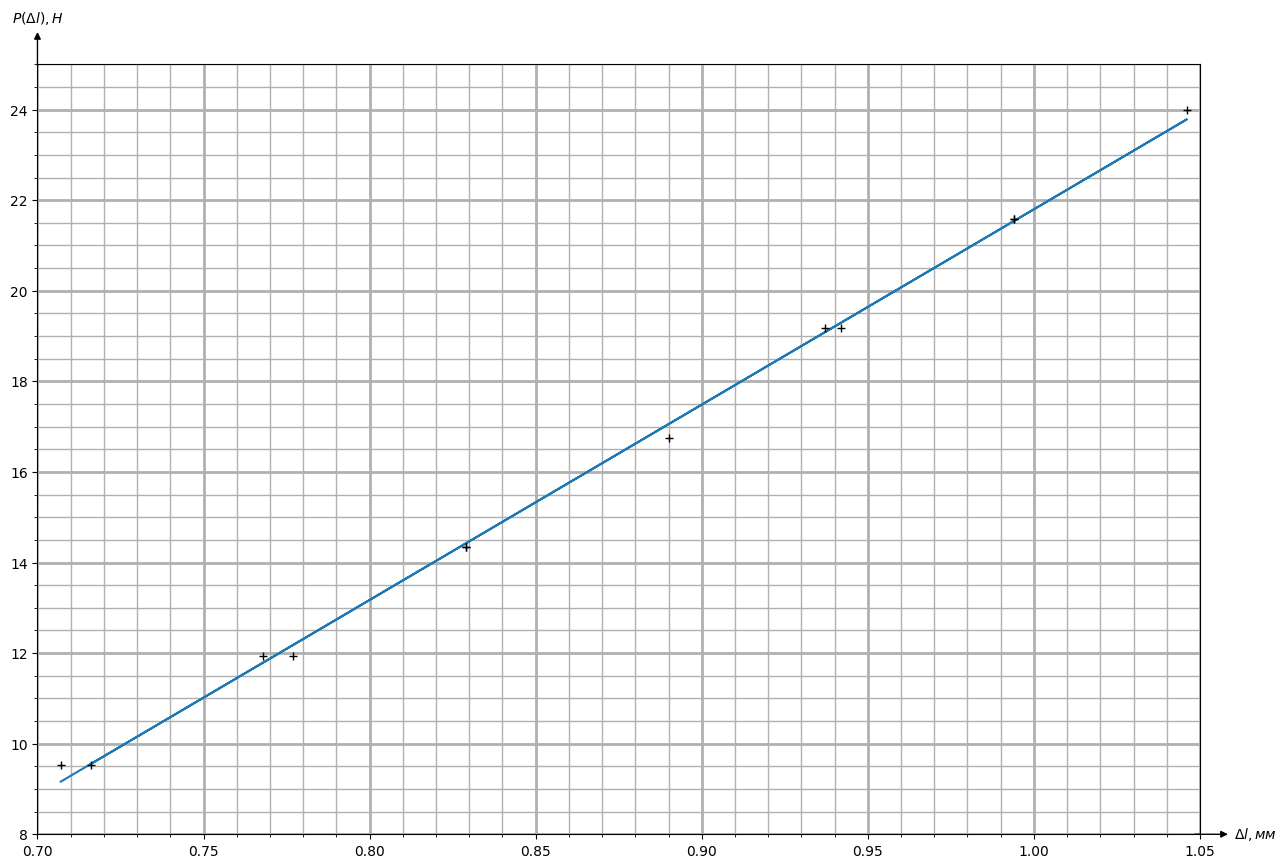

In [7]:
plt.figure(figsize=(15,10))

k,b=np.polyfit(dl[:-1],P[:-1],1)

M_fit=b+k*dl[:-1]
plt.plot(dl[:-1],M_fit)

x_err=0.038*dl
y_err=np.array([0.1,0.1,0.2,0.2,0.3])
plt.errorbar(dl[:-1],P[:-1], yerr=0, xerr=0, color='k',fmt='+', label='Кресты') 

plt.xlim(0.7,1.05)
plt.ylim(8, 25)

#— Decorate the spins
arrow_length = 30 # In points

# X-axis arrow
plt.annotate('$\Delta l, мм$', xy=(0.993, 8), xycoords=('axes fraction', 'data'),
xytext=(arrow_length, 0), textcoords='offset points',
ha='left', va='center',
arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
plt.annotate('$P(\Delta l), H$', xy=(0.7,0.995), xycoords=('data', 'axes fraction'),
xytext=(0, arrow_length), textcoords='offset points',
ha='center', va='bottom',
arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.minorticks_on()
plt.grid(which='major', lw=2)
plt.grid(which='minor', lw=1)

plt.show()

In [11]:
k*177/0.418
#b*177/0.418



18262.080687019905

In [9]:
rate_error(dl,P,k)/k

0.04381212525635749